In [1]:
import pandas as pd
import numpy as np 
import itertools
import nltk


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [2]:
reviews = pd.read_csv('../../test_data/test_strains_reviews.csv')

In [3]:
r = reviews.set_index('Unnamed: 0')
rr = r.T

## Create some lists of reviews

In [4]:
blu_dream = rr['hybrid/blue-dream'].dropna().tolist()
blu_dream

['purchased sqdc quebec blue dream aurora thc bought thought would strong sensitive thc loaded utilian g blue dream manit great felt mild head high came almost immediatly felt calm happy slightly uplifted energetic like pure sativa minute felt even relaxed throughout',
 'ehlers danlos syndrome constantly battling chronic pain blue dream one best come across relieve pain day time use also fight number stemming ailment ed',
 'tried first time today took two small hit vape waited minute thought hadnt vaped enough kicked high relaxing still get good head buzz well great chilling couch also productive want took almost pain away kicked happy blue dream',
 'dream right try smoking bed youll good night rest classic og kush blue dream forever brighten blue mood moon',
 'got relaxed put chair set haze watching tvenjoyed',
 'review vape im smoking actually cartridge abxi really looking forward trying fact maybe done thing read rave review couldnt wait get well tell feel pretty darn good right ive

In [5]:
sour_d =  rr['sativa/sour-diesel'].dropna().tolist()

In [6]:
gsc =rr['hybrid/gsc'].dropna().tolist()
green_crack = rr['sativa/green-crack'].dropna().tolist()
ogk = rr['hybrid/og-kush'].dropna().tolist()
gdp = rr['indica/granddaddy-purple'].dropna().tolist()

In [7]:
glue = rr['hybrid/original-glue'].dropna().tolist()
ww = rr['hybrid/white-widow'].dropna().tolist()

In [8]:
all_strains = blu_dream + gsc + green_crack + sour_d + ogk + gdp + glue + ww
all_strains

['purchased sqdc quebec blue dream aurora thc bought thought would strong sensitive thc loaded utilian g blue dream manit great felt mild head high came almost immediatly felt calm happy slightly uplifted energetic like pure sativa minute felt even relaxed throughout',
 'ehlers danlos syndrome constantly battling chronic pain blue dream one best come across relieve pain day time use also fight number stemming ailment ed',
 'tried first time today took two small hit vape waited minute thought hadnt vaped enough kicked high relaxing still get good head buzz well great chilling couch also productive want took almost pain away kicked happy blue dream',
 'dream right try smoking bed youll good night rest classic og kush blue dream forever brighten blue mood moon',
 'got relaxed put chair set haze watching tvenjoyed',
 'review vape im smoking actually cartridge abxi really looking forward trying fact maybe done thing read rave review couldnt wait get well tell feel pretty darn good right ive

In [9]:
d = {'blu_dream': blu_dream, 'sour_d': sour_d, 'gsc': gsc, 'green_crack': green_crack, 'ogk': ogk, 'gdp': gdp, 'glue': glue, 'ww' :ww}

df = pd.concat([pd.Series(v, name=k) for k, v in d.items()], axis=1)
df

,blu_dream,sour_d,gsc,green_crack,ogk,gdp,glue,ww
0,purchased sqdc quebec blue dream aurora thc bo...,best looking bud opinion im love dense bud lik...,made paranoid felt like dying,one little intense normally stick high cbd str...,nice high would buy problem reccomend sleep,new cannabis user high twice friend trying str...,good anxiety social activity good taste smell,strain always extremely harsh smoke sure knock
1,ehlers danlos syndrome constantly battling chr...,ohhhhhh sour diesel friend oooooo boy enjoying...,gsc akagirl scout cooky cooky something everyo...,great,girlfriend smoking bonding experience hit love...,one best strain ive tried started lastly year ...,insane glued couch,honestly favourite mine yes generally job gett...
2,tried first time today took two small hit vape...,shit fucking amazing stress motivation ended w...,best consumed g joint form favorite drink snac...,remember st heard strain age listening kottonm...,famous strain reason balanced hybrid high lege...,helped focus pain okay daytime use paranoia,great gorilla glue strain volcano vaporizer fe...,energetic great paranoid
3,dream right try smoking bed youll good night r...,star plus good adhd especially short euphoria ...,midth century tulip first introduced western e...,great morning wakenbake andor afternoon deligh...,favorite yet smoked bowl way door thermo class...,gdp wow isnt strain taken lightly tend find gr...,gorilla glue number definitely chillaxing high...,got mine route clone cannabis tulsa oklahoma s...
4,got relaxed put chair set haze watching tvenjoyed,strong high long lasting sticky,back guerrilla glue isnt available good flavor...,think good strong hope good high though,distillate form recommended nighttime use pres...,curaleaf extraction vape cart review curaleaf ...,loved gorilla glue high super mellowing good c...,white widow probably favorite sativa smoked fa...
5,review vape im smoking actually cartridge abxi...,always favorite love skunky taste find best st...,fire used treatment ptsd stomach spasm ibs eve...,good energy anxiety,definitely top far strain former opioid addict...,cgmjh,vaping pax era beautiful,first weed zien der eigenlijk geweun vr conten...
6,one favorite nice high keeping clarity relaxed...,one favorite sativas classic enough said,strain extremely powerfull actually made feel ...,small amount go long way total head trip energ...,super smooth real powerful punched high found ...,hi would like ti know uf send granddaddy purpl...,best love u bud keep smoking u ever,little bit go long way made feel like floating...
7,im actually smoking strain right taste smell f...,sour diesel extremely potent pungent strain gr...,smoked flower satisfied time vaped kicked butt...,gc great choice thcsensitive older guy anxiety...,little background strain origin original name ...,second review strain im focusing high taste fi...,strain pull away sativas,beautiful flower crystal like never seen smell...
8,get high little bit make feel relaxed help lot...,sour solid sativa smoke little harsh beautiful...,one perfect meim going hard time feel like shi...,nostalgic strain every time smoke reminded you...,best euphoria grown optimally great pain relie...,woke headache get terrible migraine complete n...,bought first distillate cartridge happened gg ...,excellent strain staying fun home evening vape...
9,love favorite far,tasty acquired local lansing michigan grower u...,way high thought sent panic good choice,smoked concert first time high maybe simply sm...,one favourite strain perfect everyday occasion...,daaaaaamn nigga shit put asssddsssss,great strain end busy day contrarily many hybr...,best strain felt like melting couch first smok...


In [10]:
stopwords_ = "a,able,about,across,after,all,almost,also,am,among,an,and,any,\
are,as,at,be,because,been,but,by,can,could,dear,did,do,does,either,\
else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,\
how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,\
me,might,most,must,my,neither,no,of,off,often,on,only,or,other,our,\
own,rather,said,say,says,she,should,since,so,some,than,that,the,their,\
them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,\
what,when,where,which,while,who,whom,why,will,with,would,yet,you,your]".split(',')

In [11]:
TFID = TfidfVectorizer()
all_strains_tf = TFID.fit_transform(all_strains)
all_strains_tf

<2269x7103 sparse matrix of type '<class 'numpy.float64'>'
	with 46972 stored elements in Compressed Sparse Row format>

In [12]:
review_mat, reviews_bow = strain_to_vec(df)
big_r_mat = (review_mat*review_mat.T)
print(df.columns)
reviews_bow

NameError: name 'strain_to_vec' is not defined

In [14]:
all_strains_mat, all_bow = strain_to_vec(all_strains)
all_bow

{'purchased': 4837,
 'sqdc': 5763,
 'quebec': 4861,
 'blue': 591,
 'dream': 1774,
 'aurora': 380,
 'thc': 6178,
 'bought': 653,
 'thought': 6221,
 'strong': 5923,
 'sensitive': 5374,
 'loaded': 3560,
 'utilian': 6554,
 'manit': 3700,
 'great': 2646,
 'felt': 2233,
 'mild': 3865,
 'head': 2802,
 'high': 2874,
 'came': 815,
 'immediatly': 3055,
 'calm': 805,
 'happy': 2762,
 'slightly': 5557,
 'uplifted': 6515,
 'energetic': 1945,
 'like': 3515,
 'pure': 4838,
 'sativa': 5263,
 'minute': 3889,
 'relaxed': 5022,
 'ehlers': 1899,
 'danlos': 1458,
 'syndrome': 6062,
 'constantly': 1216,
 'battling': 473,
 'chronic': 1005,
 'pain': 4364,
 'best': 520,
 'come': 1121,
 'relieve': 5039,
 'day': 1473,
 'time': 6253,
 'use': 6543,
 'fight': 2247,
 'number': 4157,
 'stemming': 5824,
 'ailment': 128,
 'ed': 1877,
 'tried': 6370,
 'today': 6281,
 'took': 6308,
 'small': 5578,
 'hit': 2916,
 'vape': 6574,
 'waited': 6661,
 'hadnt': 2718,
 'vaped': 6575,
 'kicked': 3341,
 'relaxing': 5025,
 'good': 25

In [15]:
#Vectorize the reviews for all of my strains
def strain_to_vec(s):
    TFID = TfidfVectorizer(stop_words='english', vocabulary=all_bow)
    strain_tf = TFID.fit_transform(s)
    bow = TFID.vocabulary_
    new = strain_tf.toarray()
    strain_vec = new.flatten()
    return strain_vec, bow

In [16]:
blu_dream_vec, blu_bow = strain_to_vec(blu_dream)
green_crack_vec, green_bow = strain_to_vec(green_crack)
ogk_vec, ogk_bow = strain_to_vec(ogk)
gdp_vec, gdp_bow= strain_to_vec(gdp)
sour_d_vec, sour_d_bow = strain_to_vec(sour_d)
gsc_vec, gsc_bow = strain_to_vec(gsc)
glue_vec, glue_bow = strain_to_vec(glue)
ww_vec, ww_bow = strain_to_vec(ww)

In [17]:
green_crack_vec.shape

(1677302,)

In [18]:
new_blu = blu_dream_vec.reshape((3001123,1))
new_greencrack = green_crack_vec.reshape((1677302,1))
new_ogk = ogk_vec.reshape((1309959,1))
new_gsc = gsc_vec.reshape((1933749,1))
new_sourd = sour_d_vec.reshape((3410052,1))
new_gdp = gdp_vec.reshape((1843646,1))
new_ww = ww_vec.reshape((984202,1))
new_glue = glue_vec.reshape((1566406,1))

In [19]:
#From internet can pass in two in 

def cos_sim(a, b):
	"""Takes 2 vectors a, b and returns the cosine similarity according 
	to the definition of the dot product
	"""
	dot_product = np.dot(a, b)
	norm_a = np.linalg.norm(a)
	norm_b = np.linalg.norm(b)
	return dot_product / (norm_a * norm_b)


In [20]:
#final option 
TfidfVec = TfidfVectorizer(stop_words='english', vocabulary=all_bow)
def cos_similarity():
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [ ]:
#sklearn cosine similarity function!

gc_bd_sim = cosine_similarity(new_blu, new_gdp)

array([[0.02035895, 0.        , 0.02357612, ..., 0.        , 0.        ,
        0.        ],
       [0.08194762, 0.        , 0.09489718, ..., 0.        , 0.34159986,
        0.        ],
       [0.        , 0.03689458, 0.01979203, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01942683, 0.0577606 , 0.04008006, ..., 0.03292889, 0.        ,
        0.        ],
       [0.01735998, 0.        , 0.0436779 , ..., 0.        , 0.07236534,
        0.        ],
       [0.        , 0.        , 0.06891911, ..., 0.        , 0.        ,
        0.        ]])

ValueError: shapes (1677302,) and (3001123,) not aligned: 1677302 (dim 0) != 3001123 (dim 0)

## Clustering

In [60]:
linkages = ['ward', 'complete', 'average']
hierarchical_clustering_algorithms = {
    (linkage, n): AgglomerativeClustering(
        n_clusters=n, linkage=linkage)
    for linkage, n in itertools.product(linkages, [2, 4, 5])
}

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

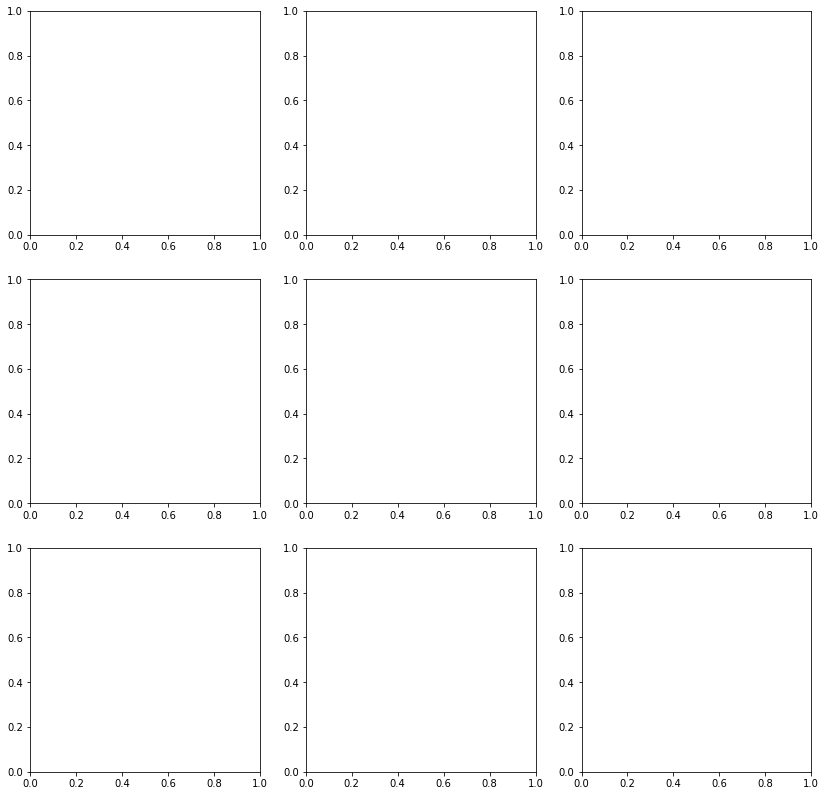

In [61]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

for (linkage, n), ax in zip(hierarchical_clustering_algorithms, axs.flatten()):
    clusterer = hierarchical_clustering_algorithms[(linkage, n)]
    clusterer.fit(all_strains_vec)
    labels = clusterer.labels_
    ax.axis('off')
    ax.scatter(all_strains_vec[:, 0], all_strains_vec[:, 1], c=labels)
    ax.set_title(f"{linkage}, {n}")

In [99]:
vec2stack = [blu_dream_vec, sour_d_vec, gdp_vec]
stacked_vec = np.concatenate((blu_dream_vec, gdp_vec))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [270]:
cluster = AgglomerativeClustering(affinity='cosine')

In [306]:
cluster.fit(stacked_vec)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.